<a href="https://colab.research.google.com/github/marufa181/CERTIFICATE/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


# Sir

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [44]:
data = pd.read_csv("dataset.csv")
data

,CustomerID,MonthlyCharges,TotalCharges,Tenure,InternetUsageHours,StreamingServicesCount,ContractLengthMonths,SupportTicketsResolved,PaymentFailures,DataOverages,AdditionalServicesCount,Churn
0,Q1EYDZW4,71.512033,92.613275,76.323002,25.346517,7.421963,6.077543,82.204000,46.437972,77.680846,90.986339,1
1,0XW1WPO6,69.076725,23.119030,30.873103,15.595253,86.698328,15.101719,28.917340,7.917692,81.719238,15.613594,0
2,87X54YY5,47.904683,98.107812,43.330109,41.542661,62.953714,50.024359,14.522983,24.417119,32.862927,35.423404,0
3,5QY6GMGV,39.616875,2.203960,97.280911,55.840969,69.543085,37.963706,50.140335,11.425159,76.980391,92.519095,0
4,XCV4ENE8,24.301590,63.601304,86.414844,91.554220,90.613161,28.127590,61.724203,60.906640,57.059570,3.755901,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,CY8QPOEA,29.954757,89.316789,59.559282,52.431473,75.043220,78.951805,51.659876,78.295186,67.004616,34.017308,0
996,2IHLYZRG,26.683802,66.686716,8.967006,43.153687,99.169367,41.555528,85.464515,20.881562,29.442058,63.551583,1
997,BPAQVDAX,55.764261,98.886617,27.222502,89.322716,58.370537,51.835918,82.855350,46.411222,49.431222,48.792006,0
998,2LS4RAZC,13.067393,5.015654,30.263503,67.103466,30.125967,74.354112,71.033468,13.127121,18.754188,62.476995,0


In [45]:
feature_cols = [
    "MonthlyCharges", "TotalCharges", "Tenure", "InternetUsageHours",
    "StreamingServicesCount", "ContractLengthMonths", "SupportTicketsResolved",
    "PaymentFailures", "DataOverages", "AdditionalServicesCount"
]
X = data[feature_cols]
y = data["Churn"]

In [46]:
X

,MonthlyCharges,TotalCharges,Tenure,InternetUsageHours,StreamingServicesCount,ContractLengthMonths,SupportTicketsResolved,PaymentFailures,DataOverages,AdditionalServicesCount
0,71.512033,92.613275,76.323002,25.346517,7.421963,6.077543,82.204000,46.437972,77.680846,90.986339
1,69.076725,23.119030,30.873103,15.595253,86.698328,15.101719,28.917340,7.917692,81.719238,15.613594
2,47.904683,98.107812,43.330109,41.542661,62.953714,50.024359,14.522983,24.417119,32.862927,35.423404
3,39.616875,2.203960,97.280911,55.840969,69.543085,37.963706,50.140335,11.425159,76.980391,92.519095
4,24.301590,63.601304,86.414844,91.554220,90.613161,28.127590,61.724203,60.906640,57.059570,3.755901
...,...,...,...,...,...,...,...,...,...,...
995,29.954757,89.316789,59.559282,52.431473,75.043220,78.951805,51.659876,78.295186,67.004616,34.017308
996,26.683802,66.686716,8.967006,43.153687,99.169367,41.555528,85.464515,20.881562,29.442058,63.551583
997,55.764261,98.886617,27.222502,89.322716,58.370537,51.835918,82.855350,46.411222,49.431222,48.792006
998,13.067393,5.015654,30.263503,67.103466,30.125967,74.354112,71.033468,13.127121,18.754188,62.476995


In [47]:
y

,Churn
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


In [48]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.71534927, 0.92703954, 0.76411142, ..., 0.46413094, 0.777642  ,
        0.91334682],
       [0.6909825 , 0.23095195, 0.30828953, ..., 0.07870835, 0.81809023,
        0.15646724],
       [0.479143  , 0.98207545, 0.43322217, ..., 0.24379677, 0.32874915,
        0.35539379],
       ...,
       [0.55778298, 0.98987633, 0.27167727, ..., 0.4638633 , 0.49469592,
        0.4896389 ],
       [0.13057418, 0.04961987, 0.30217579, ..., 0.13083237, 0.1874371 ,
        0.6270611 ],
       [0.75737011, 0.07641137, 0.03494051, ..., 0.58831382, 0.22103626,
        0.7219697 ]])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [50]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_test_pred = log_reg.predict(X_test)

In [53]:
#print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.545

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        97
           1       0.57      0.50      0.53       103

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.55      0.55      0.54       200



In [16]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("dataset.csv")

# Define feature columns and target variable
feature_cols = [
    "MonthlyCharges", "TotalCharges", "Tenure", "InternetUsageHours",
    "StreamingServicesCount", "ContractLengthMonths", "SupportTicketsResolved",
    "PaymentFailures", "DataOverages", "AdditionalServicesCount"
]
X = data[feature_cols].values
y = data["Churn"].values

# Normalize the features using Min-Max normalization
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

# Split data into training and testing sets
def train_test_split(X, y, test_size=0.2):
    np.random.seed(42)  # For reproducibility
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_count = int(test_size * len(X))
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Define helper functions for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, weights))
    return weights, cost_history

# Add intercept term to features
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Initialize weights and train the logistic regression model
weights = np.zeros(X_train.shape[1])
learning_rate = 0.01
iterations = 1000

weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

# Make predictions
def predict(X, weights):
    probabilities = sigmoid(np.dot(X, weights))
    return [1 if prob >= 0.5 else 0 for prob in probabilities]

y_test_pred = predict(X_test, weights)

# Evaluate model performance
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def classification_report(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    tn = sum((y_true == 0) & (y_pred == 0))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if tp + fp != 0 else 0
    recall = tp / (tp + fn) if tp + fn != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

    return {
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy(y_true, y_pred)
    }

print("Test Accuracy:", accuracy(y_test, y_test_pred))
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.505

Classification Report on Test Data:
{'Precision': 0, 'Recall': 0, 'F1 Score': 0, 'Accuracy': 0.505}


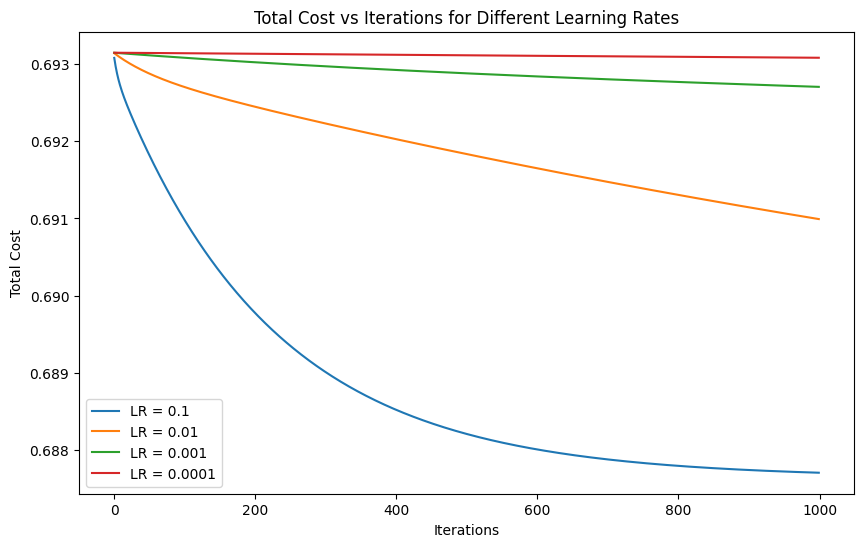

   Learning Rate  Test Accuracy
0         0.1000          0.530
1         0.0100          0.505
2         0.0010          0.440
3         0.0001          0.440


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("dataset.csv")

# Define feature columns and target variable
feature_cols = ["MonthlyCharges", "TotalCharges", "Tenure", "InternetUsageHours",
    "StreamingServicesCount", "ContractLengthMonths", "SupportTicketsResolved",
    "PaymentFailures", "DataOverages", "AdditionalServicesCount"]
X = data[feature_cols].values
y = data["Churn"].values

# Normalize the feature data using MinMaxScaler (manually implemented)
def normalize(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min)

X_scaled = normalize(X)

# Split data into training and testing sets manually
def train_test_split(X, y, test_size=0.2):
    np.random.seed(42)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_count = int(test_size * len(X))
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Add intercept term to features
X_train_with_intercept = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute cost function
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient Descent Implementation
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, weights))
    return weights, cost_history

# Function to make predictions
def predict(X, weights):
    probabilities = sigmoid(np.dot(X, weights))
    return [1 if prob >= 0.5 else 0 for prob in probabilities]

# Function to compute accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Test different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
test_accuracies = []
cost_history_per_lr = {}

for lr in learning_rates:
    # Initialize weights and run gradient descent
    weights = np.zeros(X_train_with_intercept.shape[1])
    iterations = 1000
    weights, cost_history = gradient_descent(X_train_with_intercept, y_train, weights, lr, iterations)

    # Predict on test set
    y_test_pred = predict(X_test_with_intercept, weights)

    # Compute test accuracy
    acc = accuracy(y_test, y_test_pred)
    test_accuracies.append(acc)

    # Store cost history for plotting
    cost_history_per_lr[lr] = cost_history

# Plot cost vs iterations for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(cost_history_per_lr[lr], label=f"LR = {lr}")
plt.xlabel("Iterations")
plt.ylabel("Total Cost")
plt.title("Total Cost vs Iterations for Different Learning Rates")
plt.legend()
plt.show()

# Create a table with learning rate and test accuracy
accuracy_table = pd.DataFrame({
    "Learning Rate": learning_rates,
    "Test Accuracy": test_accuracies
})

print(accuracy_table)


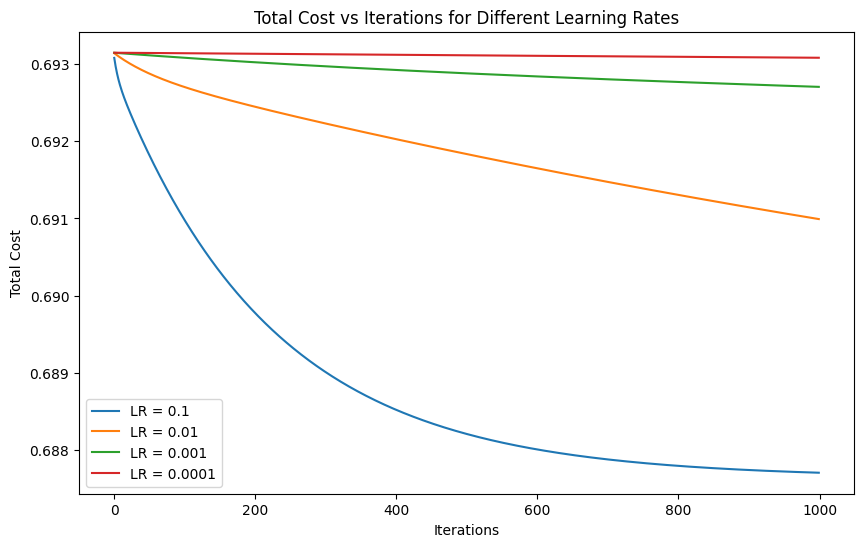

   Learning Rate  Test Accuracy
0         0.1000          0.530
1         0.0100          0.505
2         0.0010          0.440
3         0.0001          0.440


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual dataset path)
data = pd.read_csv("dataset.csv")

# Define feature columns and target variable
feature_cols =["MonthlyCharges", "TotalCharges", "Tenure", "InternetUsageHours",
    "StreamingServicesCount", "ContractLengthMonths", "SupportTicketsResolved",
    "PaymentFailures", "DataOverages", "AdditionalServicesCount"]
X = data[feature_cols].values
y = data["Churn"].values

# Normalize the feature data using MinMaxScaler (manually implemented)
def normalize(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min)

X_scaled = normalize(X)

# Split data into training and testing sets manually
def train_test_split(X, y, test_size=0.2):
    np.random.seed(42)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_count = int(test_size * len(X))
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute cost function
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient Descent Implementation
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, weights))
    return weights, cost_history

# Add intercept term to features
X_train_with_intercept = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Function to make predictions
def predict(X, weights):
    probabilities = sigmoid(np.dot(X, weights))
    return [1 if prob >= 0.5 else 0 for prob in probabilities]

# Function to compute accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Test different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
test_accuracies = []
cost_history_per_lr = {}

for lr in learning_rates:
    # Initialize weights and run gradient descent
    weights = np.zeros(X_train_with_intercept.shape[1])
    iterations = 1000
    weights, cost_history = gradient_descent(X_train_with_intercept, y_train, weights, lr, iterations)

    # Predict on test set
    y_test_pred = predict(X_test_with_intercept, weights)

    # Compute test accuracy
    acc = accuracy(y_test, y_test_pred)
    test_accuracies.append(acc)

    # Store cost history for plotting
    cost_history_per_lr[lr] = cost_history

# Plot cost vs iterations for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(cost_history_per_lr[lr], label=f"LR = {lr}")
plt.xlabel("Iterations")
plt.ylabel("Total Cost")
plt.title("Total Cost vs Iterations for Different Learning Rates")
plt.legend()
plt.show()

# Create a table with learning rate and test accuracy
accuracy_table = pd.DataFrame({
    "Learning Rate": learning_rates,
    "Test Accuracy": test_accuracies
})

print(accuracy_table)


Classification Report for Learning Rate 0.1:
Precision: 0.60
Recall: 0.46
F1-Score: 0.53
Support: 200
--------------------------------------------------
Classification Report for Learning Rate 0.01:
Precision: 0.66
Recall: 0.24
F1-Score: 0.35
Support: 200
--------------------------------------------------
Classification Report for Learning Rate 0.001:
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Support: 200
--------------------------------------------------
Classification Report for Learning Rate 0.0001:
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Support: 200
--------------------------------------------------


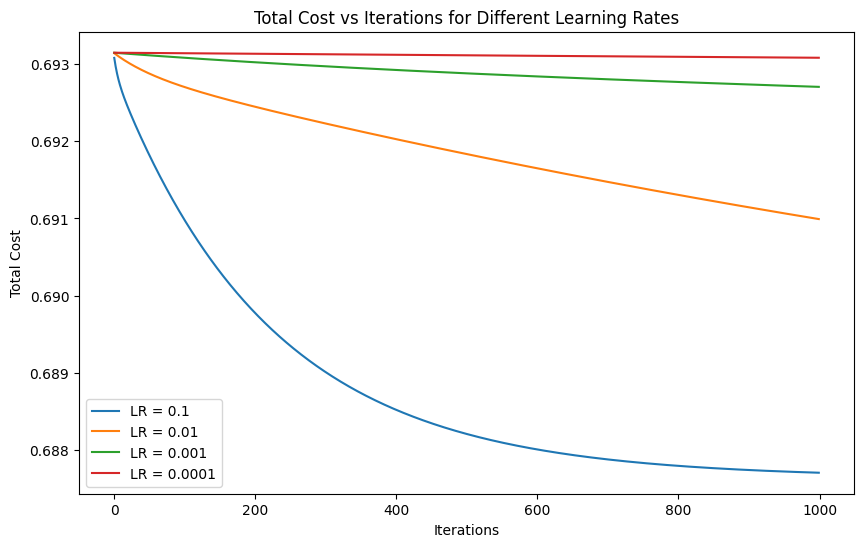

   Learning Rate  Test Accuracy
0         0.1000          0.530
1         0.0100          0.505
2         0.0010          0.440
3         0.0001          0.440


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual dataset path)
data = pd.read_csv("dataset.csv")

# Define feature columns and target variable
feature_cols =["MonthlyCharges", "TotalCharges", "Tenure", "InternetUsageHours",
    "StreamingServicesCount", "ContractLengthMonths", "SupportTicketsResolved",
    "PaymentFailures", "DataOverages", "AdditionalServicesCount"]
X = data[feature_cols].values
y = data["Churn"].values

# Normalize the feature data using MinMaxScaler (manually implemented)
def normalize(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min)

X_scaled = normalize(X)

# Split data into training and testing sets manually
def train_test_split(X, y, test_size=0.2):
    np.random.seed(42)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_count = int(test_size * len(X))
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute cost function
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient Descent Implementation
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, weights))
    return weights, cost_history

# Add intercept term to features
X_train_with_intercept = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Function to make predictions
def predict(X, weights):
    probabilities = sigmoid(np.dot(X, weights))
    return [1 if prob >= 0.5 else 0 for prob in probabilities]

# Function to compute accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Manually compute the classification report metrics
def classification_report_manual(y_true, y_pred):
    # Initialize counts
    TP = FP = TN = FN = 0

    # Count true positives, false positives, true negatives, and false negatives
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            TP += 1
        elif true == 0 and pred == 1:
            FP += 1
        elif true == 0 and pred == 0:
            TN += 1
        elif true == 1 and pred == 0:
            FN += 1

    # Calculate precision, recall, and F1 score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Create a manual classification report
    report = {
        'precision': precision,
        'recall': recall,
        'f1-score': f1_score,
        'support': len(y_true)
    }

    return report

# Test different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
test_accuracies = []
cost_history_per_lr = {}

for lr in learning_rates:
    # Initialize weights and run gradient descent
    weights = np.zeros(X_train_with_intercept.shape[1])
    iterations = 1000
    weights, cost_history = gradient_descent(X_train_with_intercept, y_train, weights, lr, iterations)

    # Predict on test set
    y_test_pred = predict(X_test_with_intercept, weights)

    # Compute test accuracy
    acc = accuracy(y_test, y_test_pred)
    test_accuracies.append(acc)

    # Store cost history for plotting
    cost_history_per_lr[lr] = cost_history

    # Manual classification report for the current learning rate
    print(f"Classification Report for Learning Rate {lr}:")
    report = classification_report_manual(y_test, y_test_pred)
    print(f"Precision: {report['precision']:.2f}")
    print(f"Recall: {report['recall']:.2f}")
    print(f"F1-Score: {report['f1-score']:.2f}")
    print(f"Support: {report['support']}")
    print("-" * 50)

# Plot cost vs iterations for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(cost_history_per_lr[lr], label=f"LR = {lr}")
plt.xlabel("Iterations")
plt.ylabel("Total Cost")
plt.title("Total Cost vs Iterations for Different Learning Rates")
plt.legend()
plt.show()

# Create a table with learning rate and test accuracy
accuracy_table = pd.DataFrame({
    "Learning Rate": learning_rates,
    "Test Accuracy": test_accuracies
})

print(accuracy_table)
